In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import requests
from jsonrpcclient import request

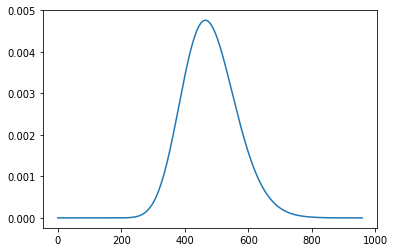

In [25]:
n = 32
l = 15

x = [i * (2 * n * l) / 1000 for i in range(1000)]
y = stats.gamma.pdf(x, a=n, scale=l)

fig, ax = plt.subplots()

ax.plot(x, y);

In [ ]:
# do coefficient of variation analysis

cv = lambda x: np.std(x, ddof=1) / np.mean(x)

steps = [
    2, 3, 4, 6, 8, 12, 16, 24, 32, 48, 64, 96, 128, 192, 256, 384, 512, 768, 1024,
    1536, 2048, 3072, 4096, 6144, 8192, 12228, 16384, 24576, 32768
    
]
cv_means = [0] * len(steps)

for i, step in enumerate(steps):
    cv_sum = 0
    cv_count = 0
    for start_index in range(12970712 - START_BLOCKNUM, END_BLOCKNUM - START_BLOCKNUM - step, step):
        bf = [blocks[j]['basefee'] for j in range(start_index, start_index + step)]
        cv_sum += cv(bf)
        cv_count += 1
    cv_means[i] = cv_sum / cv_count

fig, ax = plt.subplots(figsize=(12,8))
ax.semilogx(steps, cv_means);

In [ ]:
# group blocks by block number (rather than timestamp)

group_size = 32

# get group boundaries (ensure we divide blocks cleanly into pre- and post-London)
first_group = START_BLOCKNUM + (LONDON_BLOCKNUM - START_BLOCKNUM) % group_size
num_groups = (END_BLOCKNUM - first_group) // group_size

run_start_time = time.time()
last_update = 0

group_price_deciles = []
group_price_deciles_type2 = []
group_mean_basefees = []

for groupnum in range(num_groups):
    group_start = first_group + groupnum * group_size
    group_tx_gas_used = []
    group_tx_gas_price = []
    group_tx_type = []
    for blocknum in range(group_start, group_start + group_size):
        ind = blocknum - START_BLOCKNUM
        group_tx_gas_used += blocks[ind]['txs_gas_used']
        group_tx_gas_price += blocks[ind]['txs_gas_price']
        group_tx_type += blocks[ind]['txs_type']
    
    tuples = zip(*sorted(zip(group_tx_gas_price, group_tx_gas_used, group_tx_type)))
    group_tx_gas_price, group_tx_gas_used, group_tx_type = [list(t) for t in tuples]
    
    group_total_gas = sum(group_tx_gas_used)
    group_total_type2_gas = sum(g for i, g in enumerate(group_tx_gas_used) if group_tx_type[i] == 2)
    cumulative_gas = 0
    cumulative_type2_gas = 0
    deciles = [None] * 9
    type2_deciles = [None] * 9
    for i, g in enumerate(group_tx_gas_used):
        cumulative_gas += g
        for j, d in enumerate(deciles):
            if d is None and cumulative_gas >= group_total_gas * (j + 1) / 10:
                deciles[j] = group_tx_gas_price[i] / 1e9
        if group_tx_type[i] == 2:
            cumulative_type2_gas += g
            for j, d in enumerate(type2_deciles):
                if d is None and cumulative_type2_gas >= group_total_type2_gas * (j + 1) / 10:
                    type2_deciles[j] = group_tx_gas_price[i] / 1e9
        
    group_price_deciles += [deciles]
    group_price_deciles_type2 += [type2_deciles]
    
    current_time = time.time()
    if current_time - last_update > 0.1:
        last_update = current_time
        frac = (groupnum + 1) / num_groups
        runtime_str = str(timedelta(seconds=int(current_time - run_start_time)))
        print("runtime: " + runtime_str + f" {100 * frac:.2f}% complete", end='\r')

print("complete in " + runtime_str + (' ' * 20))

In [3]:
ERIGON_URL = "http://192.168.1.104:8545/"
rq = request('eth_getTransactionByBlockNumberAndIndex', [hex(12965000), hex(10)])
tx = requests.post(ERIGON_URL, json=rq).json()
print(tx)

{'jsonrpc': '2.0', 'id': 2, 'result': {'blockHash': '0x9b83c12c69edb74f6c8dd5d052765c1adf940e320bd1291696e6fa07829eee71', 'blockNumber': '0xc5d488', 'from': '0x0000a0756737268a633cd9296f1b154cf74430b6', 'gas': '0x4e200', 'gasPrice': '0x840fc1280', 'hash': '0x9e3d52ddbdde3bf2ac34651e5d96d2367694b0483f46a5bd9d771a6d900ee638', 'input': '0x178979ae0000000000000000000000000000000476fde29330084b2b0b08a9f7d2ac6f2b0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000006000000000000000000000000000000000000000000000000000000000000001044a25d94a0000000000000000000000000000000000000000000000004f828ffeafa5400000000000000000000000000000000000000000000000052c0ebb419c4bc0000000000000000000000000000000000000000000000000000000000000000000a00000000000000000000000000000006daea1723962647b7e189d311d757fb79300000000000000000000000000000000000000000000000000000000610bdb200000000000000000000000000000000000000000000000000000000000000002000000